In [1]:
from src.data import read_data,prepare_data
from src.models import train_model,predict_model
import pandas as pd
pd.options.mode.chained_assignment = None
%matplotlib inline

In [2]:
# Reading the data
PATH_TO_TRAIN = '../data/raw/train15.csv'
PATH_TO_PREDICTORS = '../data/raw/predictors15.csv'
df_original = read_data.read_data(PATH_TO_TRAIN,PATH_TO_PREDICTORS)

In [3]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56952 entries, 0 to 56951
Data columns (total 15 columns):
ZONEID       56952 non-null int64
TIMESTAMP    56952 non-null datetime64[ns]
POWER        56952 non-null float64
VAR78        56952 non-null float64
VAR79        56952 non-null float64
VAR134       56952 non-null float64
VAR157       56952 non-null float64
VAR164       56952 non-null float64
VAR165       56952 non-null float64
VAR166       56952 non-null float64
VAR167       56952 non-null float64
VAR169       56952 non-null float64
VAR175       56952 non-null float64
VAR178       56952 non-null float64
VAR228       56952 non-null float64
dtypes: datetime64[ns](1), float64(13), int64(1)
memory usage: 7.0 MB


In [4]:
df_original.head()

,ZONEID,TIMESTAMP,POWER,VAR78,VAR79,VAR134,VAR157,VAR164,VAR165,VAR166,VAR167,VAR169,VAR175,VAR178,VAR228
0,1,2012-04-01 01:00:00,0.754103,0.001967,0.003609,94843.6250,60.221909,0.244601,1.039334,-2.503039,294.448486,2577830.0,1202532.0,2861797.0,0.000000
1,1,2012-04-01 02:00:00,0.555000,0.005524,0.033575,94757.9375,54.678604,0.457138,2.482865,-2.993330,295.651367,5356093.0,2446757.0,5949378.0,0.000000
2,1,2012-04-01 03:00:00,0.438397,0.030113,0.132009,94732.8125,61.294891,0.771429,3.339867,-1.982535,294.454590,7921788.0,3681336.0,8939176.0,0.001341
3,1,2012-04-01 04:00:00,0.145449,0.057167,0.110645,94704.0625,67.775284,0.965866,3.106102,-1.446051,293.261475,9860520.0,4921504.0,11331679.0,0.002501
4,1,2012-04-01 05:00:00,0.111987,0.051027,0.189560,94675.0000,70.172989,0.944669,2.601146,-1.904493,292.732910,11143097.0,6254380.0,13105558.0,0.003331


In [5]:
df_original.describe()

,ZONEID,POWER,VAR78,VAR79,VAR134,VAR157,VAR164,VAR165,VAR166,VAR167,VAR169,VAR175,VAR178,VAR228
count,56952.000000,56952.000000,56952.000000,56952.000000,56952.000000,56952.000000,56952.000000,56952.000000,56952.000000,56952.000000,5.695200e+04,5.695200e+04,5.695200e+04,56952.000000
mean,2.000000,0.186872,0.041470,0.016408,93807.236996,67.610793,0.436522,0.738276,-0.257701,285.435328,1.250545e+07,1.382187e+07,1.462089e+07,0.000997
std,0.816504,0.274926,0.122040,0.050371,1106.902058,20.336232,0.400015,2.452712,1.983266,7.051843,6.593117e+06,7.755640e+06,7.049271e+06,0.003445
min,1.000000,0.000000,0.000000,0.000000,90345.875000,6.348233,0.000000,-8.908603,-8.404230,269.436279,1.147127e+05,8.216176e+05,6.465230e+05,0.000000
25%,1.000000,0.000000,0.000000,0.000000,92903.000000,52.359467,0.012650,-0.775085,-1.594760,280.142761,7.616334e+06,7.271122e+06,9.568199e+06,0.000000
50%,2.000000,0.003117,0.002919,0.000117,94008.093750,70.545609,0.353457,0.368076,-0.411445,284.784790,1.141026e+07,1.368581e+07,1.342308e+07,0.000000
75%,3.000000,0.333608,0.033479,0.007191,94668.203125,84.952175,0.884594,2.143609,0.944802,290.000977,1.742018e+07,2.002196e+07,2.002346e+07,0.000257
max,3.000000,1.003550,4.103422,0.820470,96317.125000,102.838364,1.000008,13.056718,10.710998,310.458496,3.462558e+07,3.467366e+07,3.772200e+07,0.055961


In [6]:
# Renaming columns to be more descriptive
df = df_original.rename(index=str, columns={"VAR78":"LIQUID_WATER", "VAR79": "ICE_WATER",  "VAR134":"SURFACE_PRESSURE","VAR157":"RELATIVE_HUMIDITY","VAR164":"TOTAL_CLOUD_COVER","VAR165":"WIND_U","VAR166":"WIND_V","VAR167":"TEMPERATURE","VAR169":"SOLAR_RAD","VAR175":"TERMAL_RAD","VAR178":"TOP_NET_SOLAR_RAD","VAR228":"TOTAL_PRECIPATION"})

In [7]:
# Let's see just one zone to start
df = df[df["ZONEID"]==1].drop("ZONEID", axis=1)
df = df.set_index("TIMESTAMP")

In [8]:
df.index

DatetimeIndex(['2012-04-01 01:00:00', '2012-04-01 02:00:00',
               '2012-04-01 03:00:00', '2012-04-01 04:00:00',
               '2012-04-01 05:00:00', '2012-04-01 06:00:00',
               '2012-04-01 07:00:00', '2012-04-01 08:00:00',
               '2012-04-01 09:00:00', '2012-04-01 10:00:00',
               ...
               '2014-05-31 15:00:00', '2014-05-31 16:00:00',
               '2014-05-31 17:00:00', '2014-05-31 18:00:00',
               '2014-05-31 19:00:00', '2014-05-31 20:00:00',
               '2014-05-31 21:00:00', '2014-05-31 22:00:00',
               '2014-05-31 23:00:00', '2014-06-01 00:00:00'],
              dtype='datetime64[ns]', name='TIMESTAMP', length=18984, freq=None)

In [9]:
df.describe()

,POWER,LIQUID_WATER,ICE_WATER,SURFACE_PRESSURE,RELATIVE_HUMIDITY,TOTAL_CLOUD_COVER,WIND_U,WIND_V,TEMPERATURE,SOLAR_RAD,TERMAL_RAD,TOP_NET_SOLAR_RAD,TOTAL_PRECIPATION
count,18984.000000,18984.000000,18984.000000,18984.000000,18984.000000,18984.000000,18984.000000,18984.000000,18984.000000,1.898400e+04,1.898400e+04,1.898400e+04,18984.000000
mean,0.172299,0.039550,0.016278,94724.678012,67.948892,0.426930,0.812708,-0.315936,285.922753,1.254881e+07,1.396826e+07,1.462040e+07,0.000966
std,0.260955,0.117216,0.051075,597.882578,20.110157,0.400557,2.786294,1.861407,7.164036,6.643693e+06,7.803003e+06,7.059662e+06,0.003374
min,0.000000,0.000000,0.000000,92582.125000,6.348233,0.000000,-8.908603,-7.636124,270.266357,1.488887e+05,8.659728e+05,6.577261e+05,0.000000
25%,0.000000,0.000000,0.000000,94332.984375,53.183895,0.009338,-1.089515,-1.508247,280.590271,7.569896e+06,7.398022e+06,9.536756e+06,0.000000
50%,0.003205,0.002429,0.000087,94735.062500,70.920830,0.324795,0.601741,-0.483771,285.272705,1.141520e+07,1.384422e+07,1.339417e+07,0.000000
75%,0.283798,0.031169,0.006665,95143.500000,85.231335,0.876406,2.444510,0.841155,290.574402,1.755923e+07,2.019789e+07,2.001354e+07,0.000212
max,0.916154,3.184086,0.749807,96317.125000,101.790909,1.000007,13.056718,8.979910,310.458496,3.435448e+07,3.467366e+07,3.720136e+07,0.047260


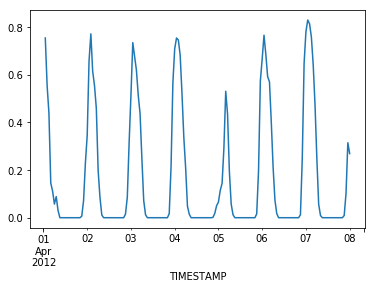

In [10]:
df[:24*7]["POWER"].plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000C63A49C1D0>,
      dtype=object)

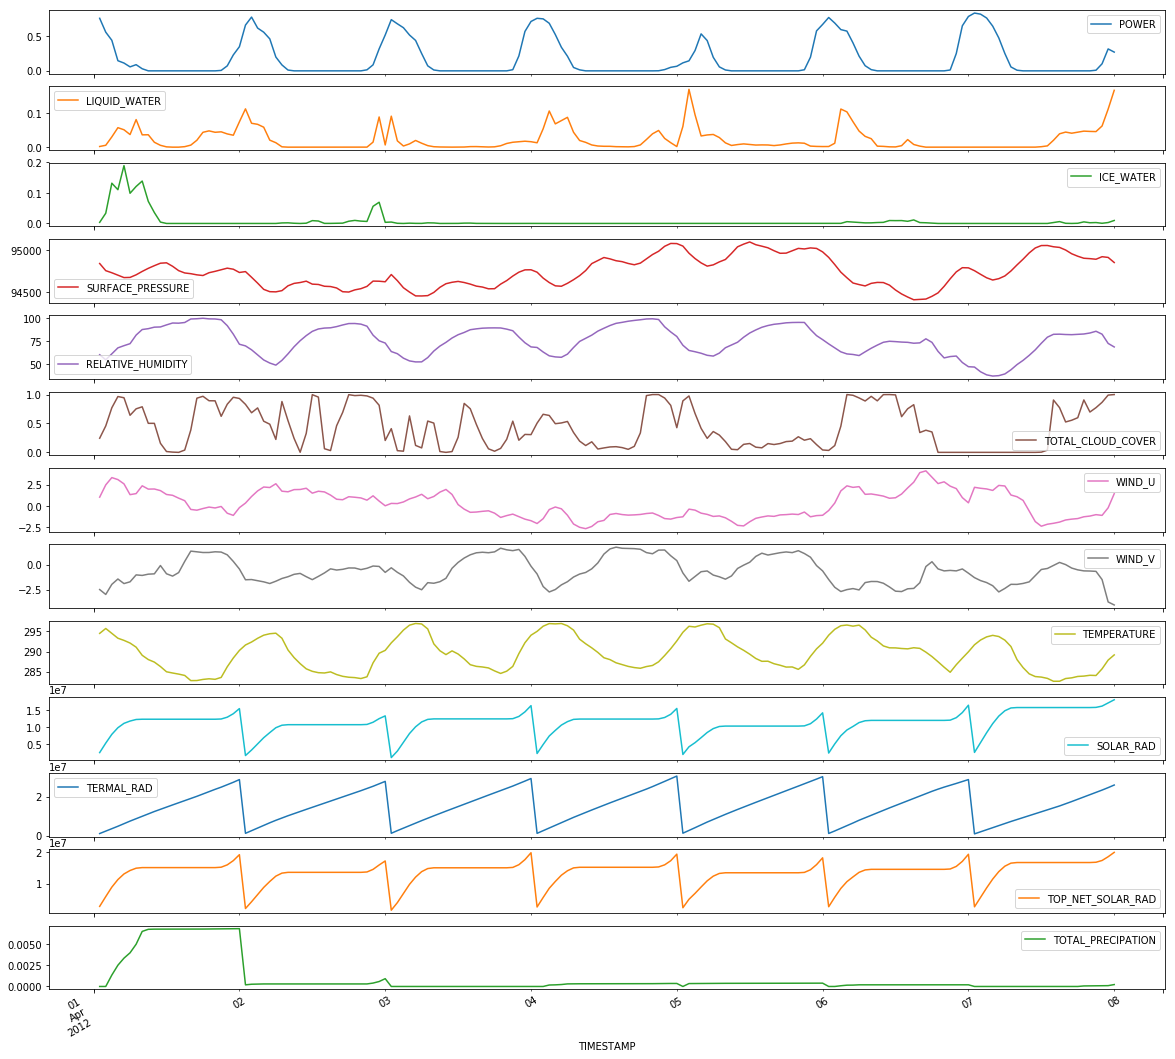

In [11]:
#for column in df:
df[:24*7].plot(subplots=True,figsize=(20,20))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000C63B4875C0>,
      dtype=object)

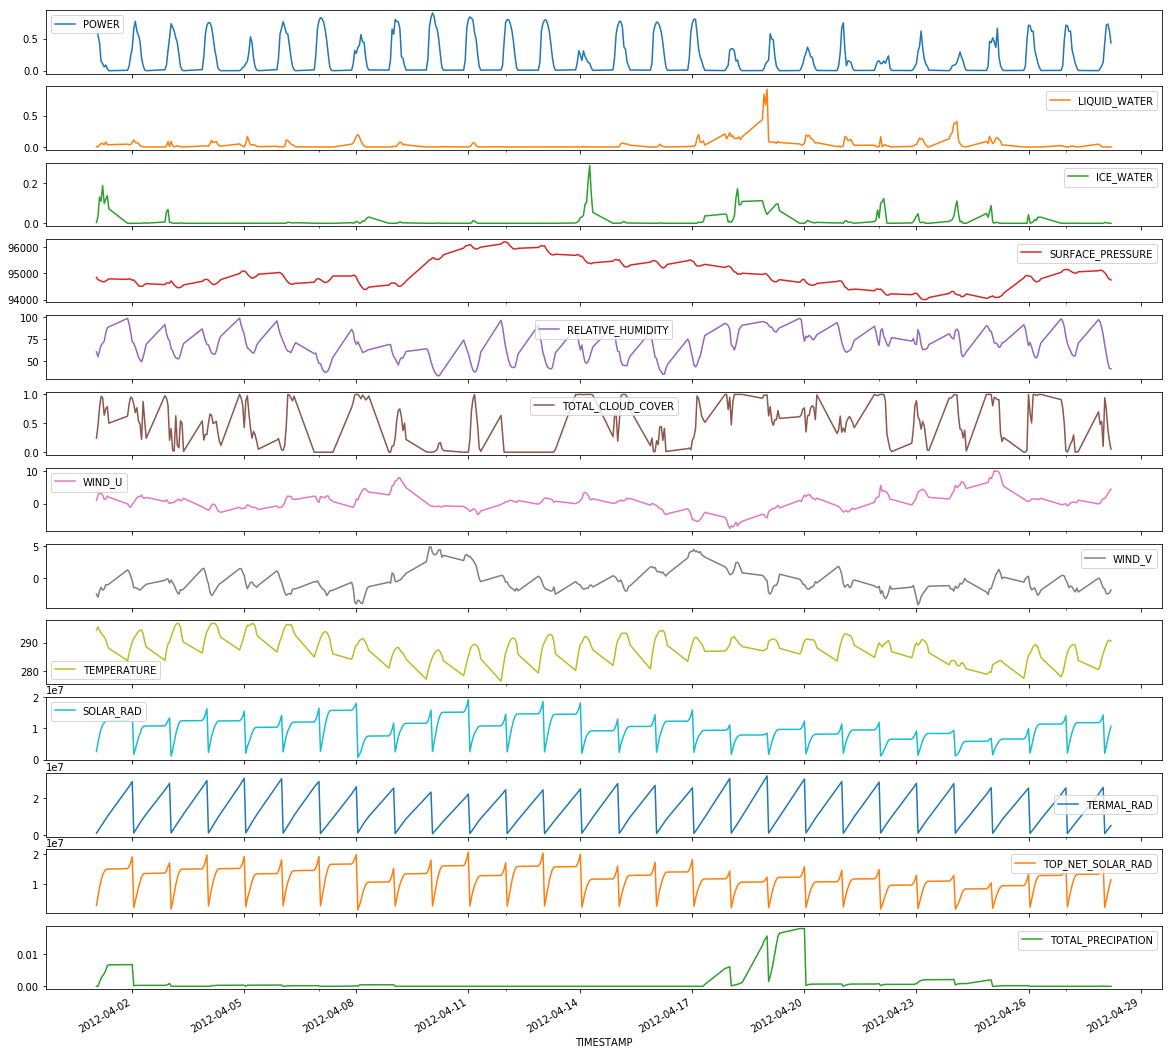

In [12]:
# Obviously there's a time that the sun is not present (7-) so let's get rid of those hours
df[df["POWER"] != 0][:24*7*2].plot(subplots=True,figsize=(20,20))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000C63DD7D358>,
      dtype=object)

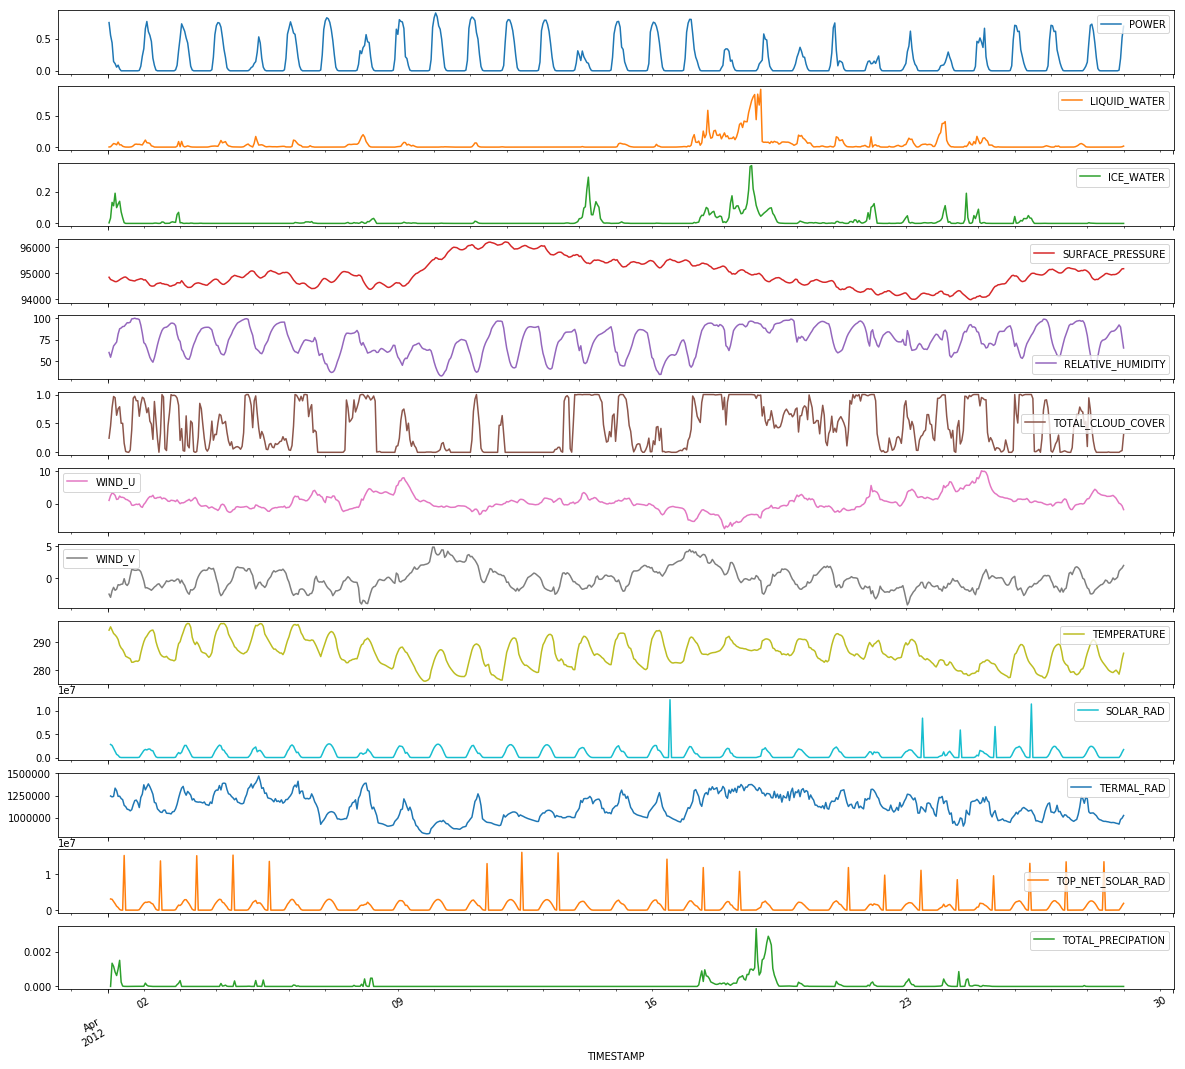

In [13]:
for column in ['TOTAL_PRECIPATION','TOP_NET_SOLAR_RAD','TERMAL_RAD','SOLAR_RAD']:
    df[column] = df[column].rolling(window=2).apply(lambda x: x[1] if x[1] - x[0] < 0 else x[1] - x[0], raw='True')
df[:24*7*4].plot(subplots=True,figsize=(20,20))

In [14]:
df.index

DatetimeIndex(['2012-04-01 01:00:00', '2012-04-01 02:00:00',
               '2012-04-01 03:00:00', '2012-04-01 04:00:00',
               '2012-04-01 05:00:00', '2012-04-01 06:00:00',
               '2012-04-01 07:00:00', '2012-04-01 08:00:00',
               '2012-04-01 09:00:00', '2012-04-01 10:00:00',
               ...
               '2014-05-31 15:00:00', '2014-05-31 16:00:00',
               '2014-05-31 17:00:00', '2014-05-31 18:00:00',
               '2014-05-31 19:00:00', '2014-05-31 20:00:00',
               '2014-05-31 21:00:00', '2014-05-31 22:00:00',
               '2014-05-31 23:00:00', '2014-06-01 00:00:00'],
              dtype='datetime64[ns]', name='TIMESTAMP', length=18984, freq=None)

In [ ]:
featute_columns = ['POWER','SURFACE_PRESSURE','LIQUID_WATER','ICE_WATER','TOTAL_PRECIPATION','RELATIVE_HUMIDITY']
df = df.resample('24H').sum()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000C64BBDD358>,
      dtype=object)

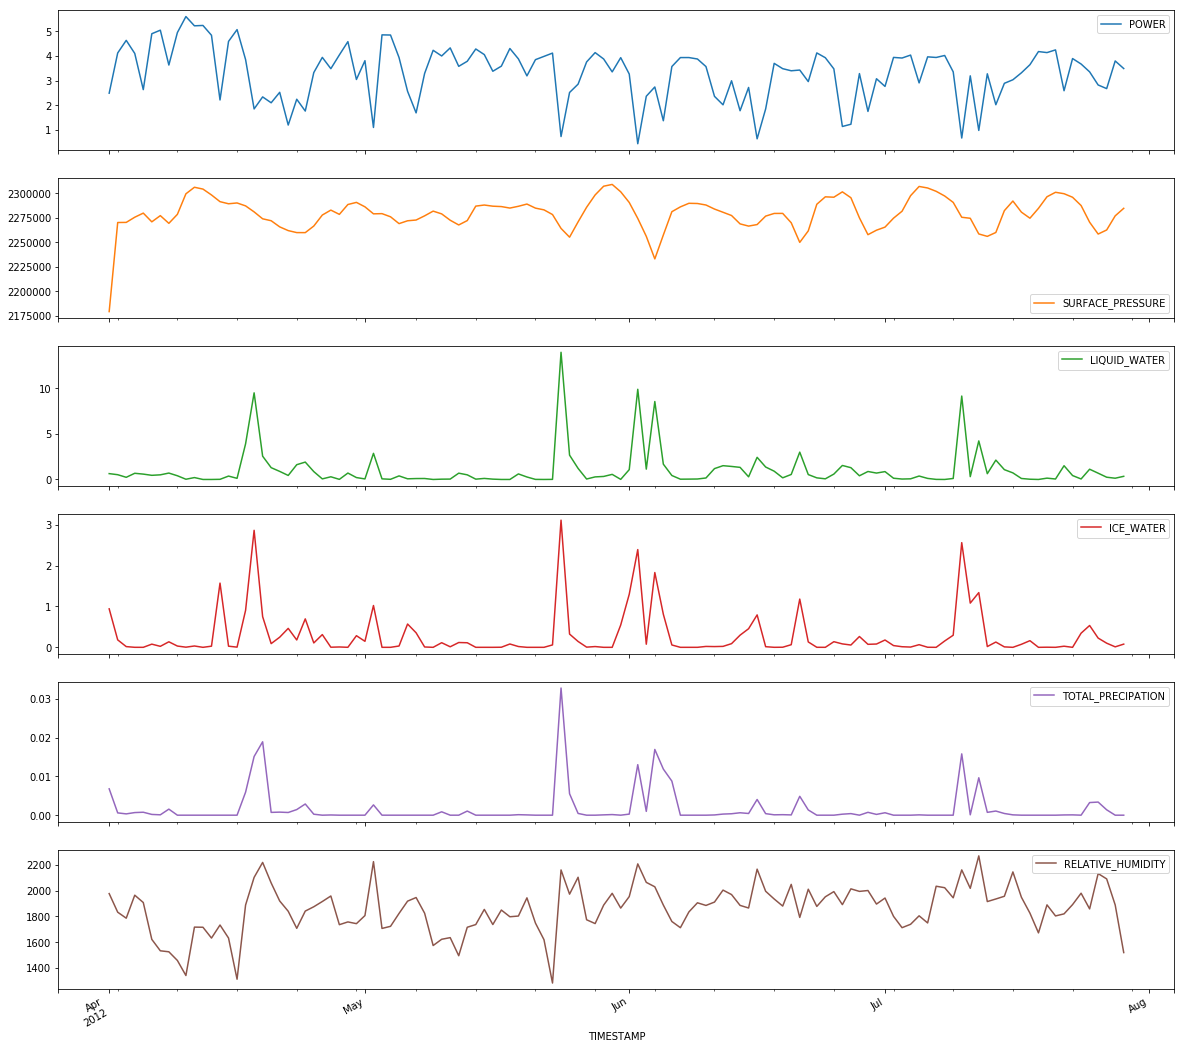

In [24]:
df[:30*4][featute_columns].plot(subplots=True,figsize=(20,20))

In [16]:
def add_rolling(df,columns, intervals, shift):
    for column in columns:
        for i in intervals:
            if i >= shift:
                rolling_column = df[column].rolling(window = i)
                df["ROLLING_MEAN_"+column+"_"+str(i)] = rolling_column.mean().shift(shift)
                df["ROLLING_MIN_"+column+"_"+str(i)] = rolling_column.min().shift(shift)
                df["ROLLING_MAX_"+column+"_"+str(i)] = rolling_column.max().shift(shift)
                df["ROLLING_SUM_"+column+"_"+str(i)] = rolling_column.sum().shift(shift)
                df["ROLLING_MEDIAN_"+column+"_"+str(i)] = rolling_column.median().shift(shift)
                df["ROLLING_STD_"+column+"_"+str(i)] = rolling_column.std().shift(shift)
                df["ROLLING_VAR_"+column+"_"+str(i)] = rolling_column.var().shift(shift)
                df["ROLLING_SKEW_"+column+"_"+str(i)] = rolling_column.skew().shift(shift)
                df["ROLLING_KURT_"+column+"_"+str(i)] = rolling_column.kurt().shift(shift)
    return df

In [17]:
intervals = [24]
df = add_rolling(df, featute_columns, intervals, 24)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000C63F378D30>,
      dtype=object)

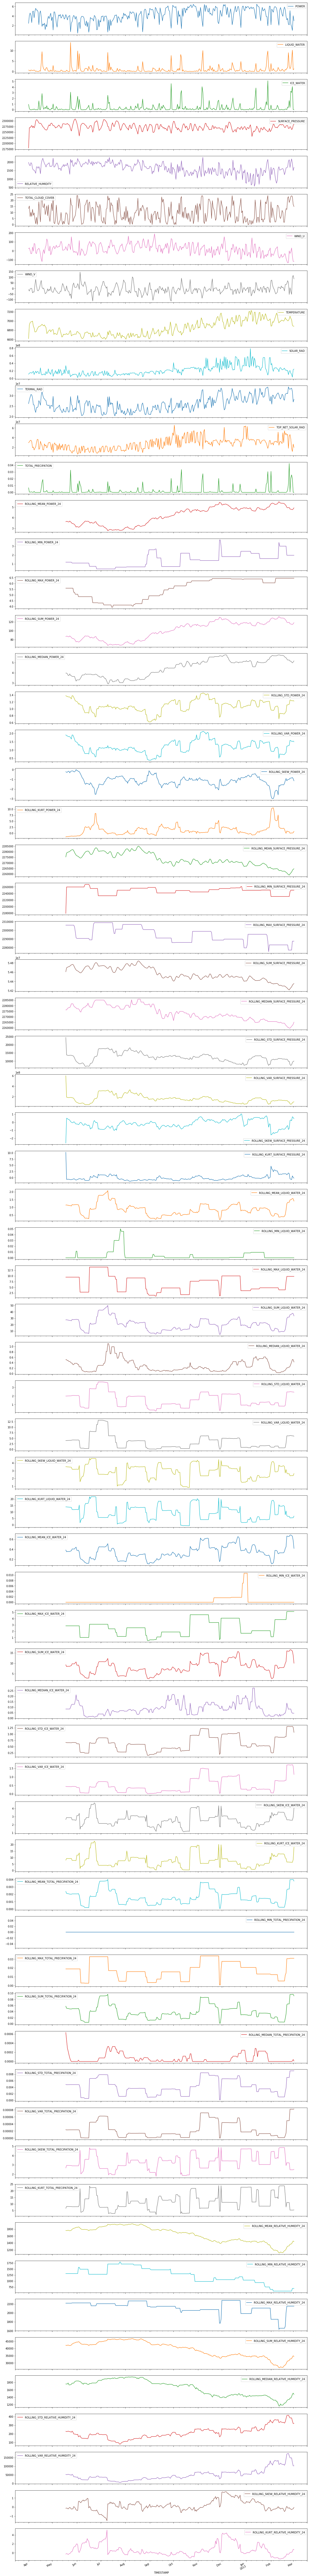

In [18]:
df[:24*7*2].plot(subplots=True,figsize=(20,200))